vecteur prix :  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.2 0.2
 0.2 0.2 0.2 0.2 0.1 0.1]
Nombre d'iterations :  100000
lambdak :  [2.63985448e+01 5.99198719e-04 5.99198719e-04 5.99198719e-04
 5.99198719e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19586197e-01 1.19586197e-01 1.19586197e-01
 1.19586197e-01 0.00000000e+00 0.00000000e+00 5.99198719e-04
 5.99198719e-04 3.00158656e-01 3.00158656e-01 3.00158656e-01
 3.00158656e-01 3.00158656e-01 3.00158656e-01 5.99198719e-04
 5.99198719e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
wk [-0.00295916 -0.00295916 -0.00295916 -0.00295916  2.25171331  2.25171331
  2.25171331  2.251

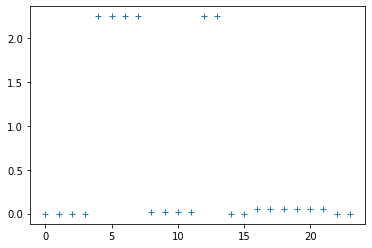

In [104]:
import numpy as np
import time
import matplotlib.pyplot as plt

"""une journée compte 24 heures, c'est sur une discrétisation en heures que nous allons construire nos vecteurs"""
h = 24

#données
b0 = 0.0043
u0 = 230
q_max = 0.050
p = np.array([0.1 for k in range(8)]+[0.2 for k in range(4)] + [0.1 for k in range(4)] + [0.2 for k in range(6)] + [0.1 for k in range(2)] )
print('vecteur prix : ', p)

# Vecteur puissance initial en kw
w_max = 9
w0 = w_max*np.ones(h)


# Définition des paramètres, donnés par le conducteur
ni = 4
nf = 13
SOC_0 = 0.3
SOC_f = 0.9

# Construisons l'indicatrice
ind = []
for i in range(h) :
    if i>nf or i<ni :
        ind.append(0)
    else :
        ind.append(1)
ind = np.array(ind)


# Fonction coût
def fun(w) :
    return np.dot(p,w)

# Gradient de la fonction coût
def grad_fun(w):
        return p

# Vecteur des contraintes
def contraintes(w) :
    c3 = q_max*(SOC_f - SOC_0) - b0 * np.dot(ind,w)
    contraintes = [c3] + list(-w) + list(w - w_max)
    return np.array(contraintes)

# Gradient des contraintes
def grad_c(w) :
    grad_c3 = - (b0 * ind)
    gradcontraintes = [grad_c3]
    identite = np.eye(h)
    for k in range(h) :
        gradcontraintes.append(- identite[k])
    for i in range(h) :
        gradcontraintes.append(identite[i])
    return np.array(gradcontraintes)

# Les coefficiens de lagrange, de taille 2h + 1, initialisés à 0
lambda0 = np.zeros(2*h + 1)

# On écrit l'algorithme :

def uzawa_fixed_step_array(fun, grad_fun, c, grad_c, w0, l, rho, lambda0, max_iter = 100000, epsilon_grad_L = 1e-8):
    k = 0
    wk = w0
    lambdak = lambda0
    grad_Lagrangienk_wk = grad_fun(wk) + np.dot(lambdak, grad_c(wk))
    while ((k<max_iter) and (np.linalg.norm(grad_Lagrangienk_wk)>epsilon_grad_L)):
        grad_Lagrangienk_wk = grad_fun(wk) + np.dot(lambdak, grad_c(wk))
        pk = - grad_Lagrangienk_wk
        wk = wk + l*pk;    
        lambdak = np.maximum(0, lambdak + rho * c(wk))        
        k = k + 1
    print("Nombre d'iterations : ", k)
    print("lambdak : ", lambdak)
    return wk

t0 = time.time()
x = uzawa_fixed_step_array(fun, grad_fun, contraintes, grad_c, w0, 0.01, 0.1, lambda0)
tf = time.time() - t0
print("wk", x)
print("temps dexecution (en s) : ", tf)

temps = np.linspace(0, 23, num=24)
plt.plot(temps, x, '+')
plt.show()


In [102]:
q_max*(SOC_f - SOC_0)-np.dot(ind,x)

-13.5443920525047